# Géneros más populares
* ¿Qué géneros son los más populares?
* ¿Existe correlación entre popularidad y beneficio?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%store -r generos
%store -r medias_votos
%store -r mean_margin

In [3]:
medias_por_gnr = pd.merge(medias_votos, generos, on='movie', how='inner')
medias_por_gnr.head()


,movie,start_year,genres_x,averagerating,genres_y
0,Sunghursh,2013,"Action,Crime,Drama",7.0,Action
1,Sunghursh,2013,"Action,Crime,Drama",7.0,Crime
2,Sunghursh,2013,"Action,Crime,Drama",7.0,Drama
3,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,Biography
4,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,Drama


In [4]:
medias_por_gnr = medias_por_gnr.groupby(medias_por_gnr.genres_y)


In [5]:
mean_rating = medias_por_gnr['averagerating'].mean().round(decimals=2)
mean_rating.sort_values(ascending=False, inplace=True)
mean_rating = mean_rating[:10,]
mean_rating.head()

genres_y
Short          8.80
Documentary    7.26
News           7.20
Biography      7.09
Music          7.04
Name: averagerating, dtype: float64

In [6]:
mean_rating=pd.DataFrame(data=mean_rating)
mean_rating.reset_index(inplace=True)
mean_rating.head()

,genres_y,averagerating
0,Short,8.80
1,Documentary,7.26
2,News,7.20
3,Biography,7.09
4,Music,7.04


In [7]:
mean_rating = mean_rating.rename(columns={'genres_y': 'Géneros', 'averagerating': 'Media'})
mean_rating.head()


,Géneros,Media
0,Short,8.80
1,Documentary,7.26
2,News,7.20
3,Biography,7.09
4,Music,7.04


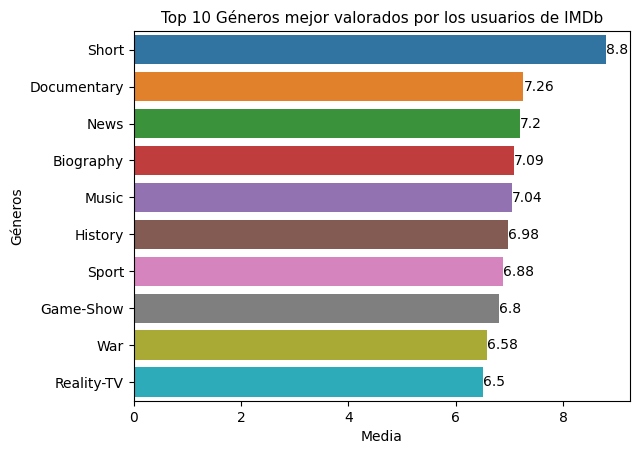

In [13]:
ax = sns.barplot(x='Media', y='Géneros',
                 data=mean_rating,
                 errwidth=0)
 
# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])
plt.title('Top 10 Géneros mejor valorados por los usuarios de IMDb', fontsize=11)
plt.show()

In [14]:
mean_rating2 = medias_por_gnr['averagerating'].mean().round(decimals=2)
mean_rating2.sort_values(ascending=False, inplace=True)
mean_rating2.head()

genres_y
Short          8.80
Documentary    7.26
News           7.20
Biography      7.09
Music          7.04
Name: averagerating, dtype: float64

In [15]:
correlation = mean_rating2.corr(mean_margin)
correlation
#Los géneros más rentables no son los mejor valorados

-0.34216162420125756